# El Niño & La Niña and Droughts in East Africa

"Every five or so years, [...] a La Niña weather cycle brings devastating drought and hunger to East Africa"
(see ["Ethiopia, Somalia and Kenya face devastating drought"](https://www.nature.com/articles/d41586-020-02698-3), Nature, 15 October 2020).  

This notebook examines the relationship between La Niña and droughts in the region using data from [Gro](https://app.gro-intelligence.com).

In [1]:
import os
from groclient import client

client = client.GroClient('api.gro-intelligence.com', os.environ['GROAPI_TOKEN'])

## Drought

There are many data series related to drought:

- the Gro Drought Index is available at the district and province level, daily and weekly. 
- a less precise evapotranspiration-only based drought indicator is available monthly at the country level. 

Let us all of them for consideration.

In [2]:
for series in client.find_data_series(item="Drought", metric="Drought severity and coverage index", region="Ethiopia"):
    client.add_single_data_series(series)

## El Niño & La Niña 

El Niño-Southern Oscillation (ENSO) data series captures the El Niño/La Niña cycle, which is global.

In [3]:
client.add_data_series(item = "Multivariate ENSO Index", metric="El Niño Southern Oscillation Index")

{'metric_id': 15851977,
 'metric_name': 'El Niño Southern Oscillation Index',
 'item_id': 13495,
 'item_name': 'Multivariate ENSO Index',
 'region_id': 0,
 'region_name': 'World',
 'partner_region_id': 0,
 'partner_region_name': 'World',
 'data_count_estimate': 509,
 'frequency_id': 6,
 'source_id': 124}

## Analysis

In [27]:
import pandas as pd

df = client.get_df()

Average all the series to monthly, across regions, into a single value per month for the whole country. Note this is very imprecise as it gives equal weight to all provinces, instead of weighting them by area.

In [33]:
print(df.shape)

all_monthly_series = []

for group, series_df in df.groupby(['item_id', 'metric_id']):
    mdf = series_df.set_index('end_date').groupby(pd.Grouper(freq="M"))
    mmdf = mdf.mean()
    all_monthly_series.append((group, mmdf))
    
for g,s in all_monthly_series:
    print(g, s.shape)

(799111, 13)
(4395, 5750029) (211, 11)
(13495, 15851977) (501, 11)
(17388, 15852252) (130, 11)


/home/nemo/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/nemo/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/nemo/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


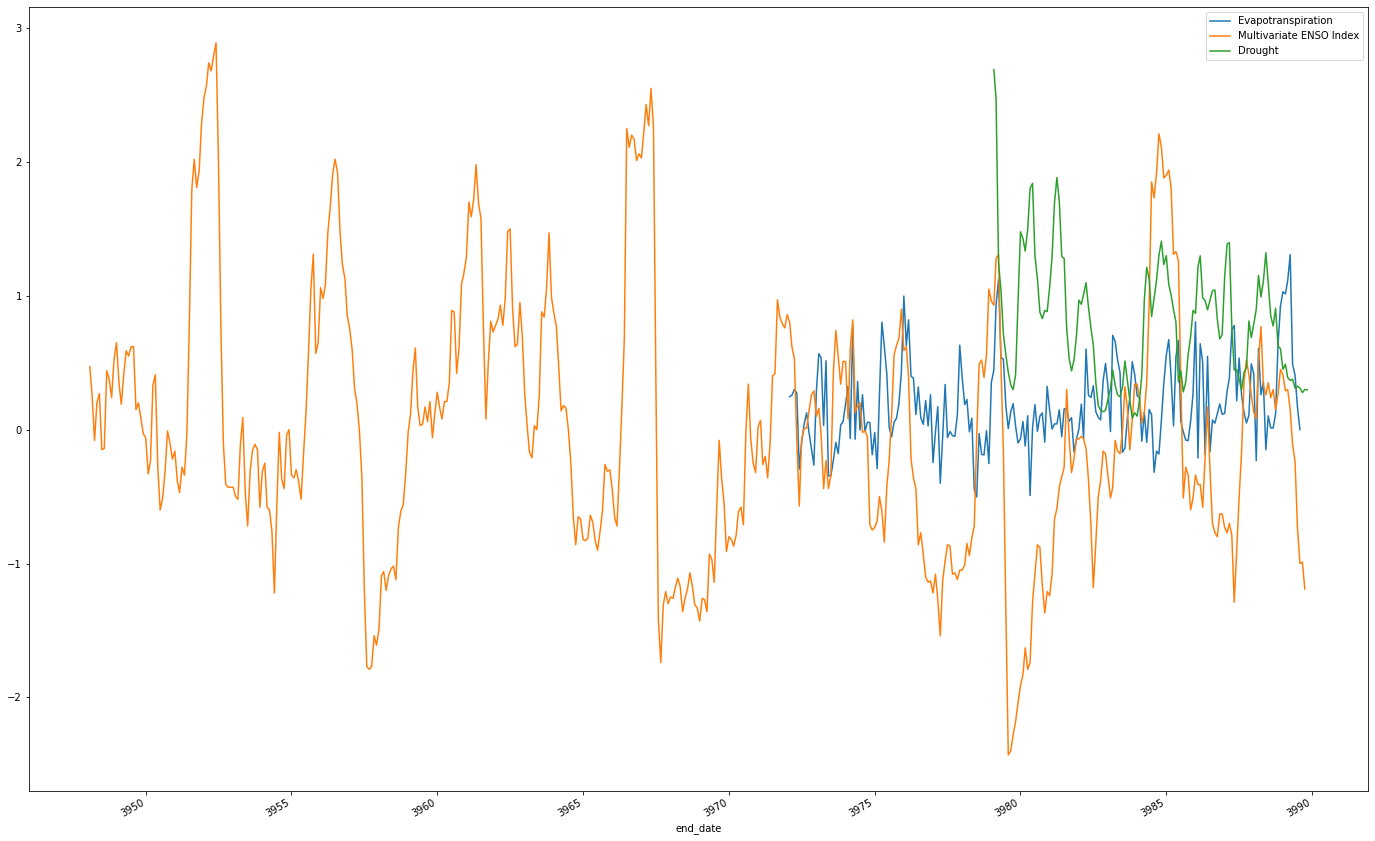

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(24,16))

for g,s in all_monthly_series:
    s.plot(y='value', ax=axes, x_compat=True,
          label="{}".format(client.lookup('items', g[0])['name']))